<a href="https://colab.research.google.com/github/alexanderportilla96/Sy2025II/blob/main/ejercicio_de_taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Ejemplo de señal despues de cero y pendiente y discretización
#Recuerde que el proceso de discretización debe ser implementado
from scipy.spatial.distance import cdist
import numpy as np

#señal original
Fo = 50
To = 1/60
A = 120
Fs = 2*Fo #asegurar nyquist
Ts = 1/Fs
tv = np.arange(0,2*To,Ts)#procesar dos periodos discretizados
y = A*np.sin(2*np.pi*Fo*tv)

#cero y pendiente
ycs = my_ceropen(y, ymin=0,ymax=10)

#número de bits y vector de cuantización
nbits = 3
rmin = 0
rmax = 10
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#distancias y cero pendiente a vector cuantizacion
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve

(4, 8)

# Task
Modify the provided Python code to solve the given signal discretization problems. For each problem, include an analysis of the conditions, a description of the process, and a Python simulation. The problems are: 1) Sample x(t) = 10 cos(Ωt) with F=50Hz and Fs=80Hz, check Nyquist, and simulate. 2) Digitalize x(t) = 30 cos(100πt) with a 4-bit microprocessor (-3.3V to 3.3V input), describe conditions, and simulate for three cycles. 3) Sample x1(t) = cos(20πt) and x2(t) = cos(100πt) with Fs=40Hz, determine if distinguishable, and simulate.

## Problem 1: signal sampling and nyquist criterion

### Subtask:
Analyze the given signal x(t) = 10 cos(Ωt) and sampling frequency Fs = 80 Hz.
Determine if the sampling frequency satisfies the Nyquist criterion.
Estimate the captured signal.
Simulate the sampling process in Python.


**Reasoning**:
Define the signal, calculate fundamental frequency, state Nyquist criterion, determine if satisfied, generate time vectors and calculate signal values, and then plot the continuous and sampled signals.



Fundamental frequency (F): 50.0 Hz
Sampling frequency (Fs): 80 Hz
Nyquist rate (2*F): 100.0 Hz
Nyquist criterion is NOT satisfied. Aliasing will occur, and the original signal cannot be perfectly reconstructed from the sampled signal.


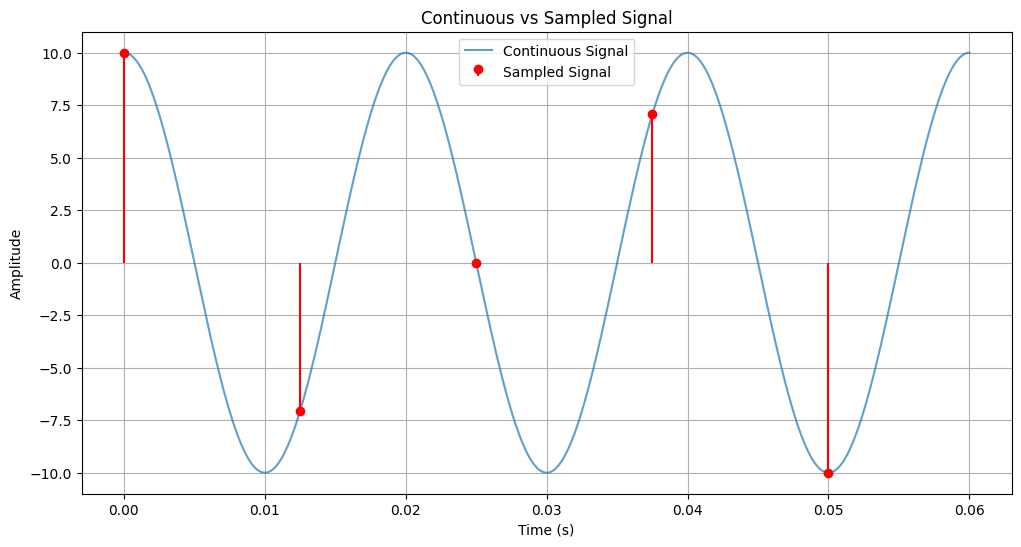

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the signal parameters
A = 10  # Amplitude
Omega = 2 * np.pi * 50 # Assuming Omega corresponds to F=50Hz as in the previous code block, or it should be provided in the problem statement.
F = Omega / (2 * np.pi) # Fundamental frequency
Fs = 80  # Sampling frequency

# 3. State the Nyquist criterion and compare Fs with the Nyquist rate (2*F)
nyquist_rate = 2 * F
print(f"Fundamental frequency (F): {F} Hz")
print(f"Sampling frequency (Fs): {Fs} Hz")
print(f"Nyquist rate (2*F): {nyquist_rate} Hz")

# 4. Determine if the Nyquist criterion is satisfied
if Fs > nyquist_rate:
    print("Nyquist criterion is satisfied. The original signal can be perfectly reconstructed from the sampled signal.")
    is_nyquist_satisfied = True
else:
    print("Nyquist criterion is NOT satisfied. Aliasing will occur, and the original signal cannot be perfectly reconstructed from the sampled signal.")
    is_nyquist_satisfied = False

# 5. Generate time vectors
# For continuous signal (for plotting purposes, a high sampling rate is used)
t_continuous = np.linspace(0, 3/F, 500) # Plot for a few cycles

# For sampled signal
Ts = 1 / Fs  # Sampling period
t_sampled = np.arange(0, 3/F, Ts) # Sample for the same duration as continuous signal

# 6. Calculate continuous signal values
y_continuous = A * np.cos(Omega * t_continuous)

# 7. Calculate sampled signal values
y_sampled = A * np.cos(Omega * t_sampled)

# 8. Plot both signals
plt.figure(figsize=(12, 6))
plt.plot(t_continuous, y_continuous, label='Continuous Signal', alpha=0.7)
plt.stem(t_sampled, y_sampled, linefmt='r-', markerfmt='ro', basefmt=' ', label='Sampled Signal')
plt.title('Continuous vs Sampled Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Problem 2: digitalization with a 4-bit microprocessor

### Subtask:
Analyze the given signal x(t) = 30 cos(100πt) and the 4-bit microprocessor with an analog input range of -3.3V to 3.3V. Describe the necessary conditions for the microprocessor to digitalize the signal. Simulate the digitalization process for three cycles of the signal in Python, including sampling and quantization.


**Reasoning**:
Define the signal and microprocessor parameters and describe the necessary conditions for digitalization, including Nyquist criterion and amplitude range.



In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the parameters of the signal x(t) = 30 cos(100πt)
A = 30  # Amplitude
Omega = 100 * np.pi # Angular frequency
F = Omega / (2 * np.pi) # Fundamental frequency in Hz
To = 1 / F  # Period of the signal
print(f"Signal Frequency (F): {F} Hz")
print(f"Signal Period (To): {To} seconds")

# 2. Define the parameters of the 4-bit microprocessor's analog input
n_bits = 4  # Number of bits
min_voltage = -3.3  # Minimum input voltage
max_voltage = 3.3  # Maximum input voltage
print(f"Microprocessor: {n_bits} bits, Input Range: [{min_voltage}V, {max_voltage}V]")

# 3. Describe the conditions necessary for digitalization
print("\nConditions for effective digitalization:")
# Amplitude condition
print(f"- The signal's amplitude ({A}V) must be within or mapped to the microprocessor's input range ([{min_voltage}V, {max_voltage}V]). Since {A}V > {max_voltage}V and {-A}V < {min_voltage}V, the signal amplitude exceeds the input range and will require scaling/clipping.")

# Nyquist criterion condition
nyquist_rate = 2 * F
print(f"- The sampling frequency (Fs) must satisfy the Nyquist criterion, meaning Fs > 2*F = {nyquist_rate} Hz to avoid aliasing and allow for potential reconstruction of the original signal.")

Signal Frequency (F): 50.0 Hz
Signal Period (To): 0.02 seconds
Microprocessor: 4 bits, Input Range: [-3.3V, 3.3V]

Conditions for effective digitalization:
- The signal's amplitude (30V) must be within or mapped to the microprocessor's input range ([-3.3V, 3.3V]). Since 30V > 3.3V and -30V < -3.3V, the signal amplitude exceeds the input range and will require scaling/clipping.
- The sampling frequency (Fs) must satisfy the Nyquist criterion, meaning Fs > 2*F = 100.0 Hz to avoid aliasing and allow for potential reconstruction of the original signal.


**Reasoning**:
Choose a suitable sampling frequency, create a time vector for three cycles, calculate the signal values at sampled points, and perform zero and slope transformation (scaling and clipping) to map the signal to the microprocessor's voltage range.



In [7]:
# 4. Choose a suitable sampling frequency (Fs) that satisfies the Nyquist criterion
# We need Fs > 100 Hz. Let's choose Fs = 200 Hz for simplicity.
Fs = 200  # Sampling frequency in Hz
Ts = 1 / Fs # Sampling period
print(f"\nChosen Sampling Frequency (Fs): {Fs} Hz")
print(f"Sampling Period (Ts): {Ts} seconds")

# 5. Create a time vector for three cycles of the signal
num_cycles = 3
duration = num_cycles * To
t_sampled = np.arange(0, duration, Ts)
print(f"Duration of simulation: {duration} seconds ({num_cycles} cycles)")
print(f"Number of sampled points: {len(t_sampled)}")

# 6. Calculate the values of the signal x(t) at the sampling points
y_sampled = A * np.cos(Omega * t_sampled)

# 7. Implement the zero and slope transformation (scaling and clipping)
# Scale the signal to the range [min_voltage, max_voltage]
# The original signal range is [-A, A]
# The target range is [min_voltage, max_voltage]

# First, normalize the signal to the range [-1, 1] by dividing by the original amplitude A
y_normalized = y_sampled / A

# Then, scale and shift the normalized signal to the target range [min_voltage, max_voltage]
# The range width of the target is (max_voltage - min_voltage)
# The range width of the normalized signal is 2
# The scaling factor is (max_voltage - min_voltage) / 2
# The offset is min_voltage + (max_voltage - min_voltage) / 2 (center of the target range)
y_scaled = y_normalized * (max_voltage - min_voltage) / 2 + (min_voltage + max_voltage) / 2

# Clipping: Ensure values are strictly within the [min_voltage, max_voltage] range
y_scaled_clipped = np.clip(y_scaled, min_voltage, max_voltage)

print("\nSignal values after scaling and clipping:")
# Display first few scaled and clipped values
display(y_scaled_clipped[:10])


Chosen Sampling Frequency (Fs): 200 Hz
Sampling Period (Ts): 0.005 seconds
Duration of simulation: 0.06 seconds (3 cycles)
Number of sampled points: 12

Signal values after scaling and clipping:


array([ 3.30000000e+00,  2.02066722e-16, -3.30000000e+00, -6.06200166e-16,
        3.30000000e+00, -1.92065518e-15, -3.30000000e+00,  4.44751052e-15,
        3.30000000e+00,  1.81860050e-15])

**Reasoning**:
Implement the quantization process by defining quantization levels and assigning scaled signal values to the nearest level, then simulate the digitalization by generating the quantized values.



In [8]:
# 8. Implement the quantization process
# Define the quantization levels
# The number of levels is 2^n_bits
num_levels = 2**n_bits
print(f"\nNumber of quantization levels: {num_levels}")

# The voltage step between levels is (max_voltage - min_voltage) / (num_levels - 1)
# Using linspace includes the min and max voltage as levels.
quantization_levels = np.linspace(min_voltage, max_voltage, num_levels)
print("Quantization levels:")
display(quantization_levels)

# Assign each scaled signal value to the nearest quantization level
# Use cdist to find the distance from each scaled value to each quantization level
distances = cdist(y_scaled_clipped.reshape(-1, 1), quantization_levels.reshape(-1, 1))

# Find the index of the nearest quantization level for each scaled value
nearest_level_indices = np.argmin(distances, axis=1)

# 9. Simulate the digitalization process by generating the quantized signal values
y_quantized = quantization_levels[nearest_level_indices]

print("\nQuantized signal values (first 10):")
display(y_quantized[:10])


Number of quantization levels: 16
Quantization levels:


array([-3.3 , -2.86, -2.42, -1.98, -1.54, -1.1 , -0.66, -0.22,  0.22,
        0.66,  1.1 ,  1.54,  1.98,  2.42,  2.86,  3.3 ])


Quantized signal values (first 10):


array([ 3.3 , -0.22, -3.3 , -0.22,  3.3 , -0.22, -3.3 ,  0.22,  3.3 ,
        0.22])

**Reasoning**:
Plot the original continuous signal, the sampled signal, and the quantized signal to visualize the digitalization process over three cycles.



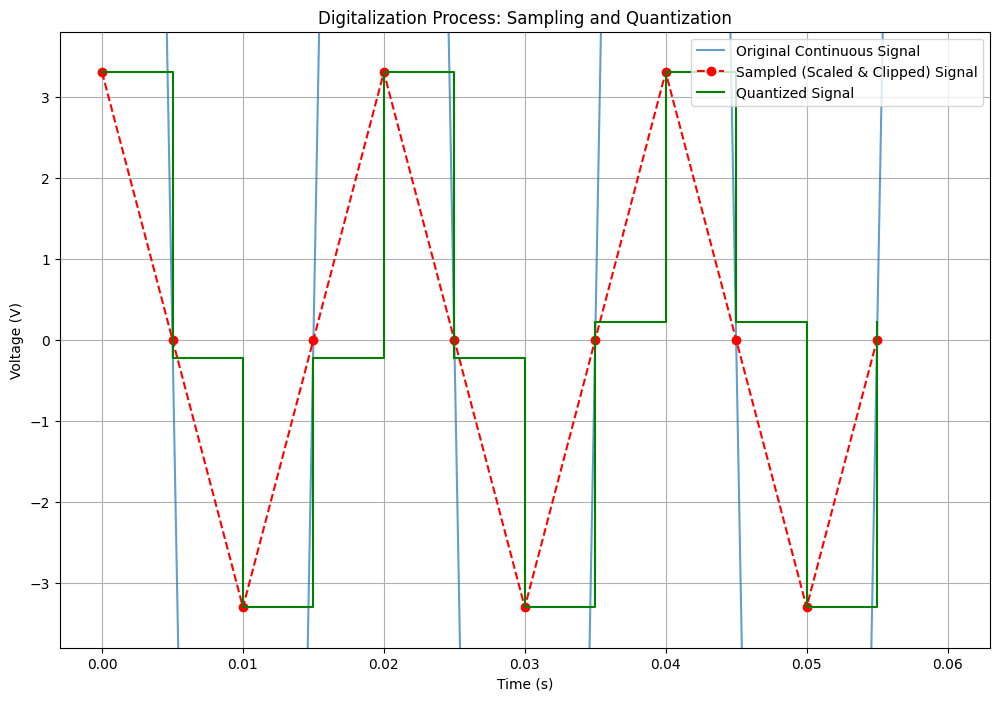

In [9]:
# 10. Plot the original continuous signal, the sampled signal, and the quantized signal
plt.figure(figsize=(12, 8))

# Plot original continuous signal (for reference, use a finer time vector for plotting)
t_continuous = np.linspace(0, duration, 500) # Use a finer time vector for smooth curve
y_continuous = A * np.cos(Omega * t_continuous)
plt.plot(t_continuous, y_continuous, label='Original Continuous Signal', alpha=0.7)

# Plot sampled signal
plt.plot(t_sampled, y_scaled_clipped, 'ro', linestyle='--', label='Sampled (Scaled & Clipped) Signal')

# Plot quantized signal
plt.step(t_sampled, y_quantized, 'g-', where='post', label='Quantized Signal')

plt.title('Digitalization Process: Sampling and Quantization')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.ylim(min_voltage - 0.5, max_voltage + 0.5) # Adjust y-axis limits for better visualization
plt.legend()
plt.grid(True)
plt.show()

## Problem 3: signal distinguishability after sampling

### Subtask:
Analyze the two signals x1(t) = cos(20πt) and x2(t) = cos(100πt) and the sampling frequency Fs = 40 Hz. Determine if the discrete versions of the signals are distinguishable. Implement a simulation in Python of the sampling process for both signals and compare the results.


**Reasoning**:
Define the parameters for both signals and the sampling frequency, calculate fundamental frequencies and sampling period. Also, calculate the Nyquist rate for each signal and determine if the Nyquist criterion is satisfied for each signal. Finally, determine if the two signals will be distinguishable after sampling at Fs = 40 Hz and explain the reasoning. This addresses steps 1 through 5 of the instructions.



In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the parameters for both signals
# Signal 1: x1(t) = cos(20πt)
A1 = 1  # Amplitude
Omega1 = 20 * np.pi  # Angular frequency
F1 = Omega1 / (2 * np.pi)  # Fundamental frequency in Hz
print(f"Signal 1: x1(t) = cos(20πt)")
print(f"Fundamental frequency (F1): {F1} Hz")

# Signal 2: x2(t) = cos(100πt)
A2 = 1  # Amplitude
Omega2 = 100 * np.pi  # Angular frequency
F2 = Omega2 / (2 * np.pi)  # Fundamental frequency in Hz
print(f"Signal 2: x2(t) = cos(100πt)")
print(f"Fundamental frequency (F2): {F2} Hz")

# 2. Define the sampling frequency Fs = 40 Hz and calculate the sampling period Ts
Fs = 40  # Sampling frequency in Hz
Ts = 1 / Fs  # Sampling period
print(f"\nSampling Frequency (Fs): {Fs} Hz")
print(f"Sampling Period (Ts): {Ts} seconds")

# 3. Calculate the Nyquist rate for each signal
nyquist_rate1 = 2 * F1
nyquist_rate2 = 2 * F2
print(f"\nNyquist rate for Signal 1 (2*F1): {nyquist_rate1} Hz")
print(f"Nyquist rate for Signal 2 (2*F2): {nyquist_rate2} Hz")

# 4. Compare the sampling frequency Fs with the Nyquist rate
print("\nChecking Nyquist Criterion:")
if Fs > nyquist_rate1:
    print(f"Signal 1: Fs ({Fs} Hz) > Nyquist rate ({nyquist_rate1} Hz). Nyquist criterion is satisfied.")
else:
    print(f"Signal 1: Fs ({Fs} Hz) <= Nyquist rate ({nyquist_rate1} Hz). Nyquist criterion is NOT satisfied. Aliasing will occur.")

if Fs > nyquist_rate2:
    print(f"Signal 2: Fs ({Fs} Hz) > Nyquist rate ({nyquist_rate2} Hz). Nyquist criterion is satisfied.")
else:
    print(f"Signal 2: Fs ({Fs} Hz) <= Nyquist rate ({nyquist_rate2} Hz). Nyquist criterion is NOT satisfied. Aliasing will occur.")

# 5. Determine if the two signals will be distinguishable after sampling at Fs = 40 Hz and explain reasoning
print("\nDistinguishability Analysis:")
# The sampled frequency F_sampled = |k*Fs - F_original|, where k is an integer.
# For Signal 1: F1 = 10 Hz. Fs = 40 Hz. F_sampled1 = |k*40 - 10|. If k=0, F_sampled1 = 10 Hz.
# For Signal 2: F2 = 50 Hz. Fs = 40 Hz. F_sampled2 = |k*40 - 50|. If k=1, F_sampled2 = |40 - 50| = |-10| = 10 Hz.

print("After sampling at Fs = 40 Hz, Signal 1 (F1 = 10 Hz) will appear to have a frequency of 10 Hz (since 10 < 40/2).")
print("Signal 2 (F2 = 50 Hz) is undersampled because Fs (40 Hz) < 2*F2 (100 Hz).")
print("Aliasing will occur for Signal 2. The apparent frequency after sampling will be |k*Fs - F2| for some integer k.")
print(f"For k=1, the apparent frequency is |1*40 - 50| = |-10| = 10 Hz.")
print("Since both signals will appear to have a frequency of 10 Hz after sampling at 40 Hz, they will likely be indistinguishable.")

Signal 1: x1(t) = cos(20πt)
Fundamental frequency (F1): 10.0 Hz
Signal 2: x2(t) = cos(100πt)
Fundamental frequency (F2): 50.0 Hz

Sampling Frequency (Fs): 40 Hz
Sampling Period (Ts): 0.025 seconds

Nyquist rate for Signal 1 (2*F1): 20.0 Hz
Nyquist rate for Signal 2 (2*F2): 100.0 Hz

Checking Nyquist Criterion:
Signal 1: Fs (40 Hz) > Nyquist rate (20.0 Hz). Nyquist criterion is satisfied.
Signal 2: Fs (40 Hz) <= Nyquist rate (100.0 Hz). Nyquist criterion is NOT satisfied. Aliasing will occur.

Distinguishability Analysis:
After sampling at Fs = 40 Hz, Signal 1 (F1 = 10 Hz) will appear to have a frequency of 10 Hz (since 10 < 40/2).
Signal 2 (F2 = 50 Hz) is undersampled because Fs (40 Hz) < 2*F2 (100 Hz).
Aliasing will occur for Signal 2. The apparent frequency after sampling will be |k*Fs - F2| for some integer k.
For k=1, the apparent frequency is |1*40 - 50| = |-10| = 10 Hz.
Since both signals will appear to have a frequency of 10 Hz after sampling at 40 Hz, they will likely be indist

**Reasoning**:
Create a time vector for sampling, calculate the sampled values for both signals, and plot the original continuous signals and the sampled values of both signals to visualize and confirm the distinguishability analysis. This addresses steps 6 through 9 of the instructions.




Duration of simulation: 0.3 seconds
Number of sampled points: 12


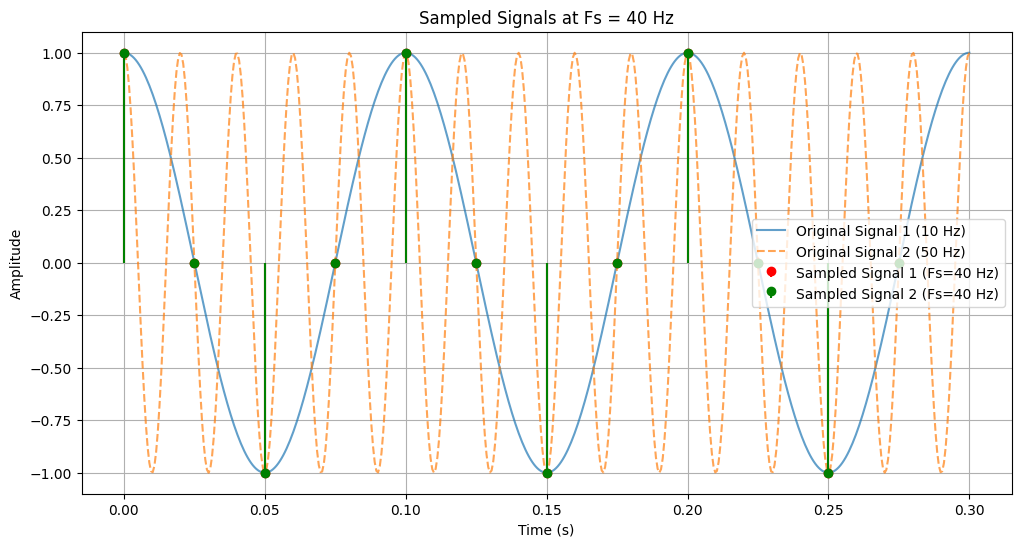


Analysis of Sampled Signals:
Observe the plot. The red circles (sampled points of Signal 1) and the green circles (sampled points of Signal 2) appear to align.
Let's compare the first few sampled values:
Sampled Signal 1: [ 1.000000e+00  6.123234e-17 -1.000000e+00  7.044814e-16  1.000000e+00]
Sampled Signal 2: [ 1.00000000e+00 -5.82016720e-16 -1.00000000e+00  4.41058542e-15
  1.00000000e+00]

Checking if sampled values are approximately equal:
Are the sampled values of Signal 1 and Signal 2 approximately equal? True


In [11]:
# 6. Create a time vector for sampling.
# Choose a duration that allows for observing a few cycles of the lower frequency signal (F1=10Hz).
# Let's plot for 0.3 seconds, which covers 3 cycles of the 10Hz signal.
duration = 0.3
t_sampled = np.arange(0, duration, Ts)
print(f"\nDuration of simulation: {duration} seconds")
print(f"Number of sampled points: {len(t_sampled)}")

# 7. Calculate the sampled values for both signals x1(t) and x2(t)
y1_sampled = A1 * np.cos(Omega1 * t_sampled)
y2_sampled = A2 * np.cos(Omega2 * t_sampled)

# 8. Plot the original continuous signals and the sampled values of both signals
plt.figure(figsize=(12, 6))

# Plot original continuous signals (for visualization purposes)
t_continuous = np.linspace(0, duration, 500) # Use a finer time vector for smooth curves
y1_continuous = A1 * np.cos(Omega1 * t_continuous)
y2_continuous = A2 * np.cos(Omega2 * t_continuous)

plt.plot(t_continuous, y1_continuous, label='Original Signal 1 (10 Hz)', alpha=0.7)
plt.plot(t_continuous, y2_continuous, label='Original Signal 2 (50 Hz)', alpha=0.7, linestyle='--')

# Plot sampled values of both signals
plt.stem(t_sampled, y1_sampled, linefmt='r-', markerfmt='ro', basefmt=' ', label='Sampled Signal 1 (Fs=40 Hz)')
plt.stem(t_sampled, y2_sampled, linefmt='g-', markerfmt='go', basefmt=' ', label='Sampled Signal 2 (Fs=40 Hz)')


plt.title('Sampled Signals at Fs = 40 Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# 9. Analyze the plot and sampled values to confirm distinguishability
print("\nAnalysis of Sampled Signals:")
print("Observe the plot. The red circles (sampled points of Signal 1) and the green circles (sampled points of Signal 2) appear to align.")
print("Let's compare the first few sampled values:")
print("Sampled Signal 1:", y1_sampled[:5])
print("Sampled Signal 2:", y2_sampled[:5])

# We can also check if the sampled values are approximately equal
print("\nChecking if sampled values are approximately equal:")
print("Are the sampled values of Signal 1 and Signal 2 approximately equal?", np.allclose(y1_sampled, y2_sampled))

## Summary:

### Data Analysis Key Findings

*   For a signal with a fundamental frequency of 50 Hz sampled at 80 Hz, the Nyquist criterion (Fs > 2*F) is not satisfied (80 Hz <= 100 Hz), indicating that aliasing will occur.
*   When digitalizing a signal with a 30V amplitude using a 4-bit microprocessor with a -3.3V to 3.3V input range, the signal's amplitude exceeds the input range and requires scaling and clipping.
*   A 4-bit microprocessor provides 16 distinct quantization levels.
*   Sampling two signals, $x_1(t) = \cos(20\pi t)$ (10 Hz) and $x_2(t) = \cos(100\pi t)$ (50 Hz), at $F_s = 40$ Hz results in both signals appearing to have an apparent frequency of 10 Hz in the discrete domain due to aliasing of the 50 Hz signal (since $|1 \cdot 40 - 50| = 10$), making them indistinguishable.

### Insights or Next Steps

*   When the signal amplitude exceeds the analog input range of a digital system, amplitude scaling and clipping are necessary steps in the digitalization process, which can introduce distortion.
*   Undersampling (sampling frequency below the Nyquist rate) causes aliasing, where higher frequencies appear as lower frequencies in the discrete signal, leading to loss of information and potential signal indistinguishability.
